<a href="https://colab.research.google.com/github/Benjamin-Siebold/MSDS686-Deep-Learning/blob/main/Week-5/Functional_API_Walk_Through_and_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Functional API
In this module, we will explore Keras's another model building API called functional API.
Here is the documentation: https://keras.io/getting-started/functional-api-guide/

In `Sequential`, you build a model by adding a layer to the `model` object:

```
model = Sequential()
model.add(Conv2D(32, 3, input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(32, 3))
model.add(Activation('relu'))
```

However, in functional API, you define the inpute parameters and pass the input into the appropiate layer and the subsequent output is passed as input into the appropiate layer.  Lastly you define the inputs and outputs in a Model layer:   
```
inputs = Input(shape=(32,32,3))
conv1 = Conv2D(32,3, activation='relu')(inputs)
conv2 = Conv2D(32,3)(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = Activation('relu')(conv2)
output = Dense(10, activation='softmax')(conv2)

model = Model(inputs=inputs, outputs=output)
```
As you can see from above, the functional API model needs a separate layer for input and output. Input() creates the the input tensor. Model() makes a model object from the output tensor. 

An advantage of functional API over Sequential is its flexibility. You can build a model architecture that has parallel paths or merging layers.

```
conv1 = Conv2D(32,3,activation='relu')(conv0)
conv2 = Conv2D(32,5,activation='relu')(conv0)
concat = Concatenate(axis=-1)([conv1, conv2])
conv3 = Conv2D(32,3,activation='relu')(concat)

```
The above example shows that the feature map from conv0 is split into two paths which are passed to conv1, and conv2 and then concatenated before passing to conv3:

```

         ____ conv1 (3x3)____
        /                    \   
conv0---                      (concatenate) -- conv3 (3x3)
        \____ conv2 (5x5)____/
        
```

# Below is an example of building a Functional API model using the CIFAR10 dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model # This will print model architecture.
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation # We add the Concatentate function
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, SeparableConv2D # We will use AveragePooling2D. Similar to MaxPooling but now we take the average value in the window.
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend, regularizers, initializers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# set np and tf random seed for reproducibility
np.random.seed(286)
tf.random.set_seed(286)
# load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# Reshape xblock data and normalize
train_images = train_images.astype('float32')/train_images.max()

test_images = test_images.astype('float32')/test_images.max()
# convert to labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#split into validation and train data
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = .2, shuffle=True) 

170500096/170498071 [==============================] - 2s 0us/step


#Here is an example on how to build a Functional API architecture

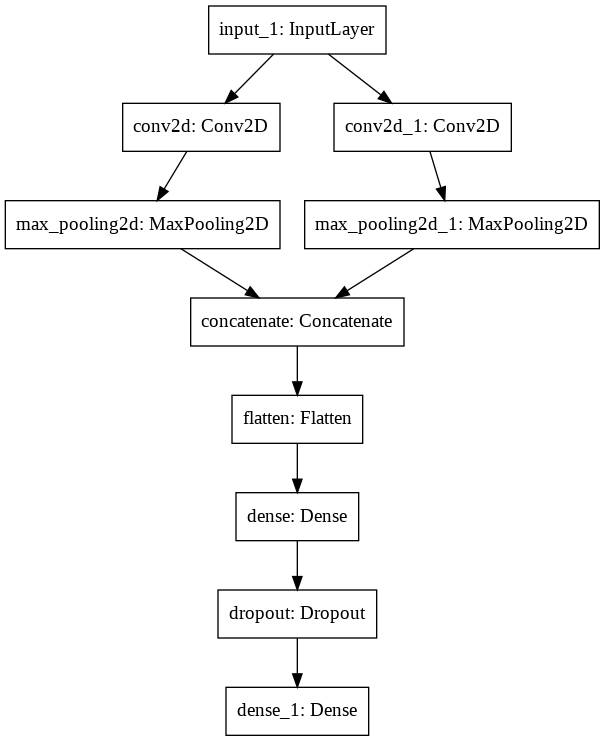

In [ ]:
backend.clear_session()

# Input model
visible = Input(shape=(32,32,3))

# Create Tower 1
conv11 = Conv2D(32, (3,3), padding = 'same', activation='relu')(visible)
pool11 = MaxPooling2D((2, 2), padding = 'same')(conv11)

# Create Tower 2
conv21 = Conv2D(32, (3,3), padding = 'same', activation='relu')(visible)
pool21 = MaxPooling2D((2,2), padding = 'same')(conv21)

# Concatentate
merge = Concatenate(axis=-1)([pool11, pool21])

# Flatten into fully connected layer
flat = Flatten()(merge)

# Hidden connected layer and output
hidden = Dense(32, activation='relu')(flat)
drop = Dropout(0.5)(hidden)
output = Dense(10, activation='softmax')(drop)

model_example = Model(inputs=visible, outputs=output)
# plot graph
plot_model(model_example)

# Your Turn.  Use the CIFAR10 dataset throughout the assignment

### Build the Inception model found in figure 7.8 in Deep Learning with Python (Chollet) 
### Print (plot) the model architecture

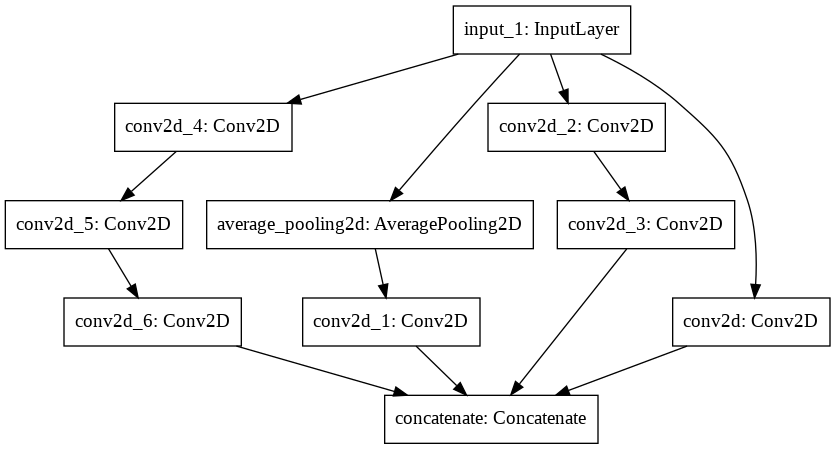

In [ ]:
# Build and print (plot) the model architecture found in figure 7.8 (Chollet)

backend.clear_session()

#input
input = Input(shape=(32,32,3))

#T1
conv2d_3 = Conv2D(64, 1, activation = 'relu', padding = 'same', strides = 2)(input)
#T2
avg_pool = AveragePooling2D((2,2), padding = 'same')(input)
conv2d_4 = Conv2D(64, (3,3), padding = 'same')(avg_pool)
#T3
conv2d_5 = Conv2D(64, 1, padding = 'same')(input)
conv2d_6 = Conv2D(64, 3, padding = 'same', strides = 2)(conv2d_5)
#T4
conv2d_7 = Conv2D(64, 1, padding = 'same')(input)
conv2d_8 = Conv2D(64, 3, padding = 'same')(conv2d_7)
conv2d_9 = Conv2D(64, 3, padding = 'same', strides = 2)(conv2d_8)
#concate
merge = Concatenate(axis=-1)([conv2d_3, conv2d_4, conv2d_6, conv2d_9])

#flatten
output = merge

#Final Layers


model = Model(inputs = input, outputs = output)

#plot
plot_model(model)

### Build the model that is shown in the Week_5_API_Model_Architecture.png figure under the Week 5 Content tab.  Choose the number of hidden units (nodes) in each layer.  Then compile, fit, plot, and assess on the test data all in one cell. 

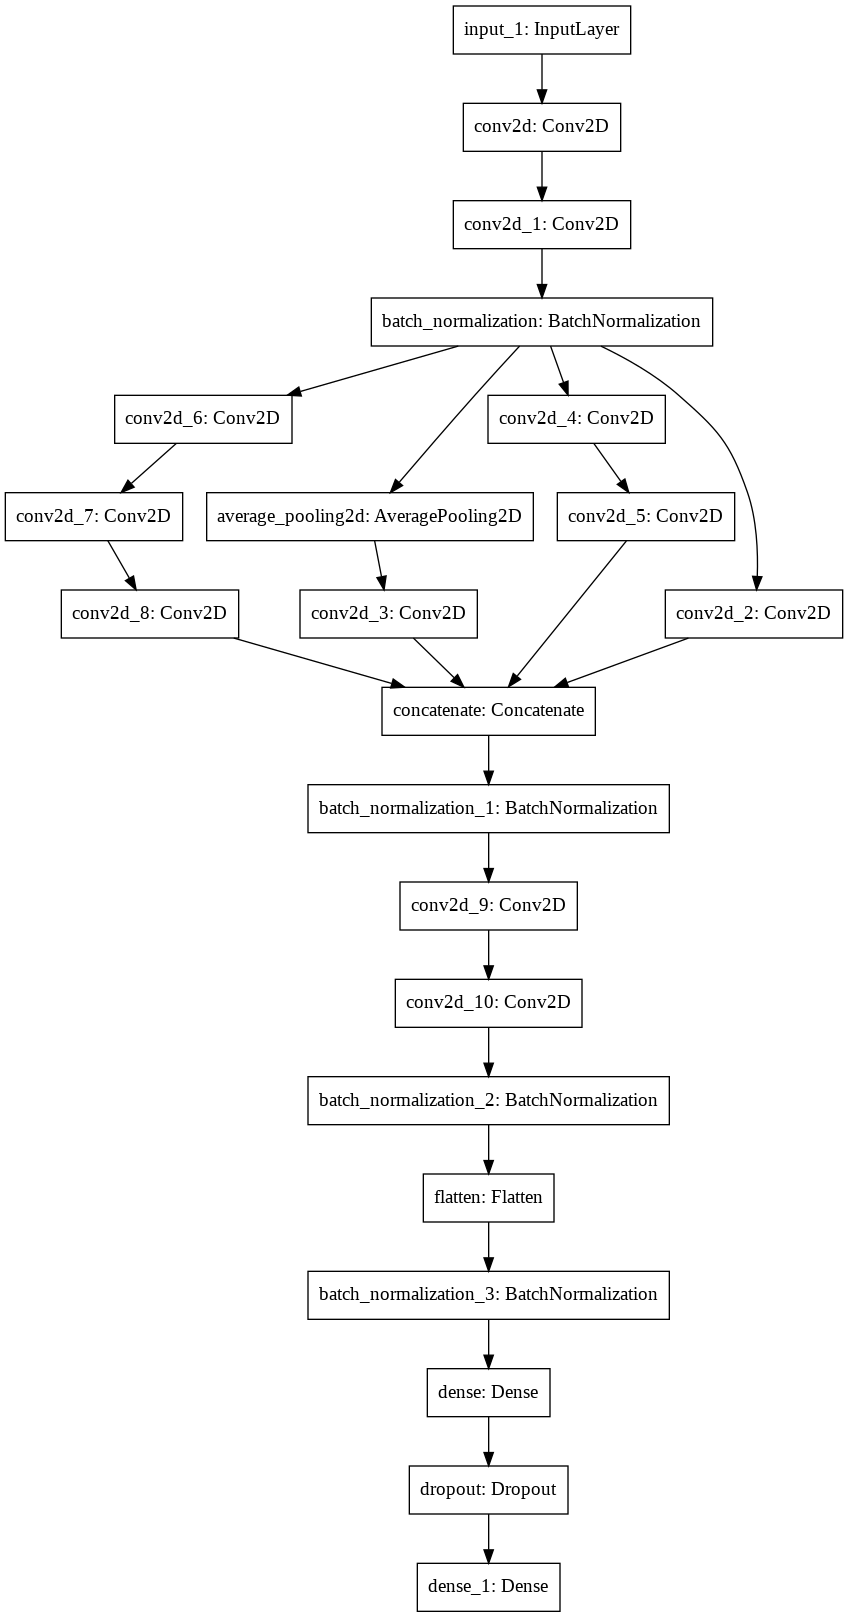

In [ ]:
# Build the model and print (plot) the model.
# Build and print (plot) the model architecture found in figure 7.8 (Chollet)

backend.clear_session()

#input
input = Input(shape=(32,32,3))

#First Layers
conv2d_1 = Conv2D(32, (3,3), padding = 'same', activation='relu')(input)
conv2d_2 = Conv2D(32, (3,3), padding = 'same', activation = 'relu')(conv2d_1)
batch_norm1 = BatchNormalization()(conv2d_2)

#T1
conv2d_3 = Conv2D(64, 1, activation = 'relu', padding = 'same', strides = 2)(batch_norm1)
#T2
avg_pool = AveragePooling2D((2,2), padding = 'same')(batch_norm1)
conv2d_4 = Conv2D(64, (3,3), padding = 'same')(avg_pool)
#T3
conv2d_5 = Conv2D(64, 1, padding = 'same')(batch_norm1)
conv2d_6 = Conv2D(64, 3, padding = 'same', strides = 2)(conv2d_5)
#T4
conv2d_7 = Conv2D(64, 1, padding = 'same')(batch_norm1)
conv2d_8 = Conv2D(64, 3, padding = 'same')(conv2d_7)
conv2d_9 = Conv2D(64, 3, padding = 'same', strides = 2)(conv2d_8)
#concate
merge = Concatenate(axis=-1)([conv2d_3, conv2d_4, conv2d_6, conv2d_9])

#output conv2d layer
batch_norm2 = BatchNormalization()(merge)
conv2d_10 = Conv2D(128, (3,3), padding = 'same')(batch_norm2)
conv2d_11 = Conv2D(128, (3,3), padding = 'same')(conv2d_10)
batch_norm3 = BatchNormalization()(conv2d_11)

#flatten
flat = Flatten()(batch_norm3)

#Final Layers
batch_norm_2 = BatchNormalization()(flat)
dense_1 = Dense(256, activation = 'relu')(batch_norm_2)
dropout = Dropout(.2)(dense_1)
output = Dense(10, activation = 'softmax')(dropout)

model = Model(inputs = input, outputs = output)

#plot
plot_model(model)

In [ ]:
#Compile, fit, plot, and assess in one cell.  
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 150,
                    verbose = 0,
                    validation_data = (x_val, y_val),
                    callbacks = [EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True)])

hist = pd.DataFrame(history.history)
hist.tail()

results = model.evaluate(test_images, test_labels)

print(results)

313/313 [==============================] - 2s 7ms/step - loss: 1.3423 - accuracy: 0.6273
[1.3422549962997437, 0.6273000240325928]


In [ ]:
hist.tail()

,loss,accuracy,val_loss,val_accuracy
3,0.949344,0.666900,1.305958,0.6115
4,0.825476,0.710975,1.076403,0.6369
5,0.734021,0.743350,1.196355,0.6097
6,0.655635,0.770925,2.707019,0.5764
7,0.598604,0.790675,1.783543,0.5794


### Optimize your neural network. Try using SeparableConv2D layers (Chollet 7.3.1) add or remove layers, change the number of units (nodes), add or remove regularization and normalization. Spend sometime optimizing the network using the techniques we have learned thus far.  Feel free to do your own research on best arcitectures.  Can you improve your test accuracy above 0.80%, which was the benchmark last week? Remember to compile, plot, assess on test data all in one cell.

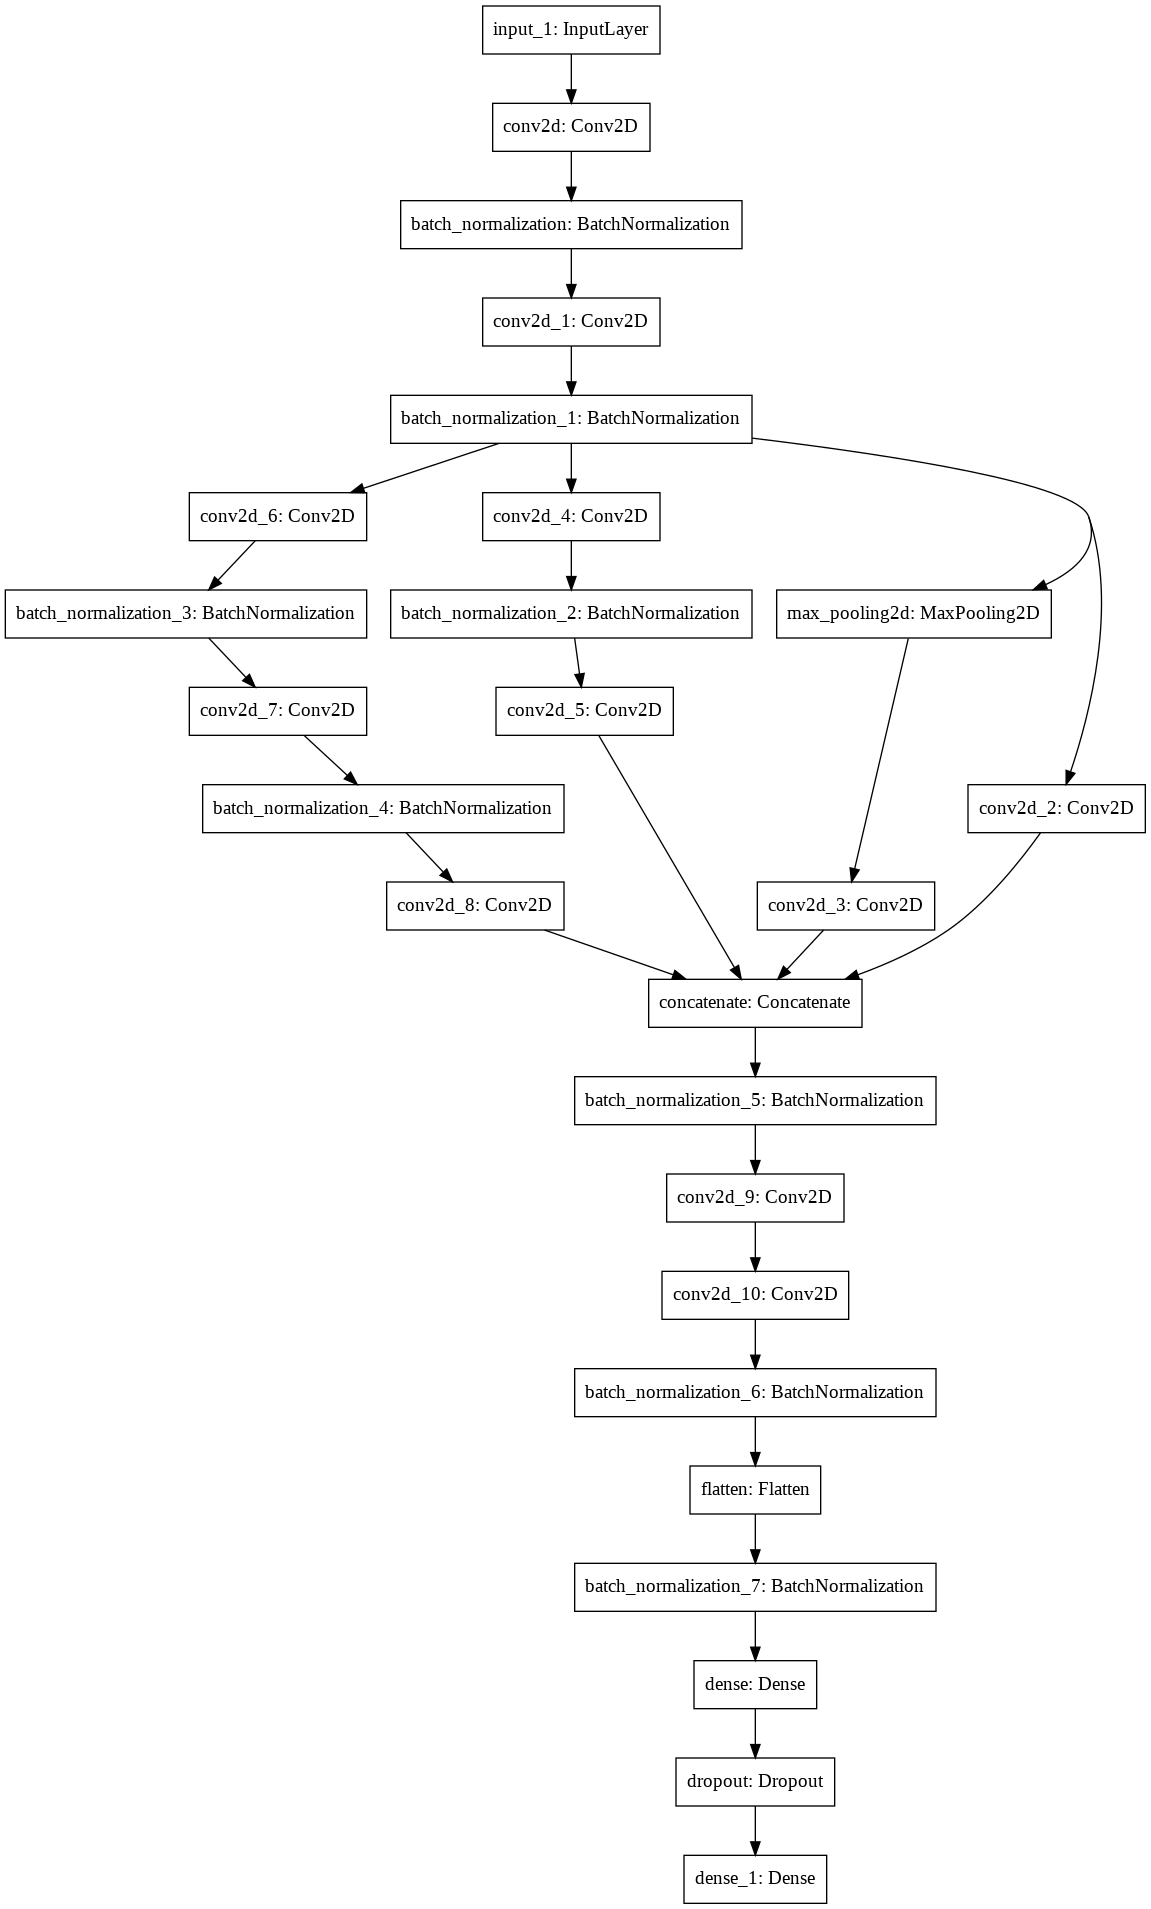

In [ ]:
# Build the model and print (plot) the model.
# Build and print (plot) the model architecture found in figure 7.8 (Chollet)

backend.clear_session()

#input
input = Input(shape=(32,32,3))

#First Layers
conv2d_1 = Conv2D(32, 3, padding = 'same', activation='relu', kernel_regularizer=regularizers.l2(.0001))(input)
batch_norm = BatchNormalization()(conv2d_1)
conv2d_2 = Conv2D(32, 3, padding = 'same', activation = 'relu', kernel_regularizer=regularizers.l2(.0001))(batch_norm)
batch_norm1 = BatchNormalization()(conv2d_2)

#T1
conv2d_3 = Conv2D(64, 1, activation = 'relu', padding = 'same', strides = 2)(batch_norm1)
#T2
avg_pool = MaxPooling2D((2,2), padding = 'same')(batch_norm1)
conv2d_4 = Conv2D(64, 3, padding = 'same')(avg_pool)
#T3
conv2d_5 = Conv2D(64, 1, padding = 'same')(batch_norm1)
batch_norm = BatchNormalization()(conv2d_5)
conv2d_6 = Conv2D(64, 3, padding = 'same', strides = 2)(batch_norm)
#T4
conv2d_7 = Conv2D(64, 1, padding = 'same')(batch_norm1)
batch_norm = BatchNormalization()(conv2d_7)
conv2d_8 = Conv2D(64, 3, padding = 'same')(batch_norm)
batch_norm = BatchNormalization()(conv2d_8)
conv2d_9 = Conv2D(64, 3, padding = 'same', strides = 2)(batch_norm)
#concate
merge = Concatenate(axis=-1)([conv2d_3, conv2d_4, conv2d_6, conv2d_9])

#output conv2d layer
batch_norm2 = BatchNormalization()(merge)
conv2d_10 = Conv2D(128, 3, padding = 'same')(batch_norm2)
conv2d_11 = Conv2D(128, 3, padding = 'same')(conv2d_10)
batch_norm3 = BatchNormalization()(conv2d_11)

#flatten
flat = Flatten()(batch_norm3)

#Final Layers
batch_norm_2 = BatchNormalization()(flat)
dense_1 = Dense(256, activation = 'relu')(batch_norm_2)
dropout = Dropout(.2)(dense_1)
output = Dense(10, activation = 'softmax')(dropout)

model = Model(inputs = input, outputs = output)

#plot
plot_model(model)

In [ ]:
# Compile, fit, plot, and assess in one cell.
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 100,
                    verbose = 0,
                    validation_data = (x_val, y_val),
                    callbacks = [EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True)])
hist = pd.DataFrame(history.history)
hist.tail()

results = model.evaluate(test_images, test_labels)

print(results)

313/313 [==============================] - 3s 8ms/step - loss: 1.2739 - accuracy: 0.6247
[1.2739322185516357, 0.6247000098228455]


In [ ]:
hist.tail()

,loss,accuracy,val_loss,val_accuracy
1,1.379884,0.522625,1.534368,0.4891
2,1.141384,0.600600,1.235893,0.5908
3,0.984714,0.653375,1.265631,0.5752
4,0.859910,0.694625,1.771953,0.5386
5,0.781372,0.725850,1.500424,0.5861


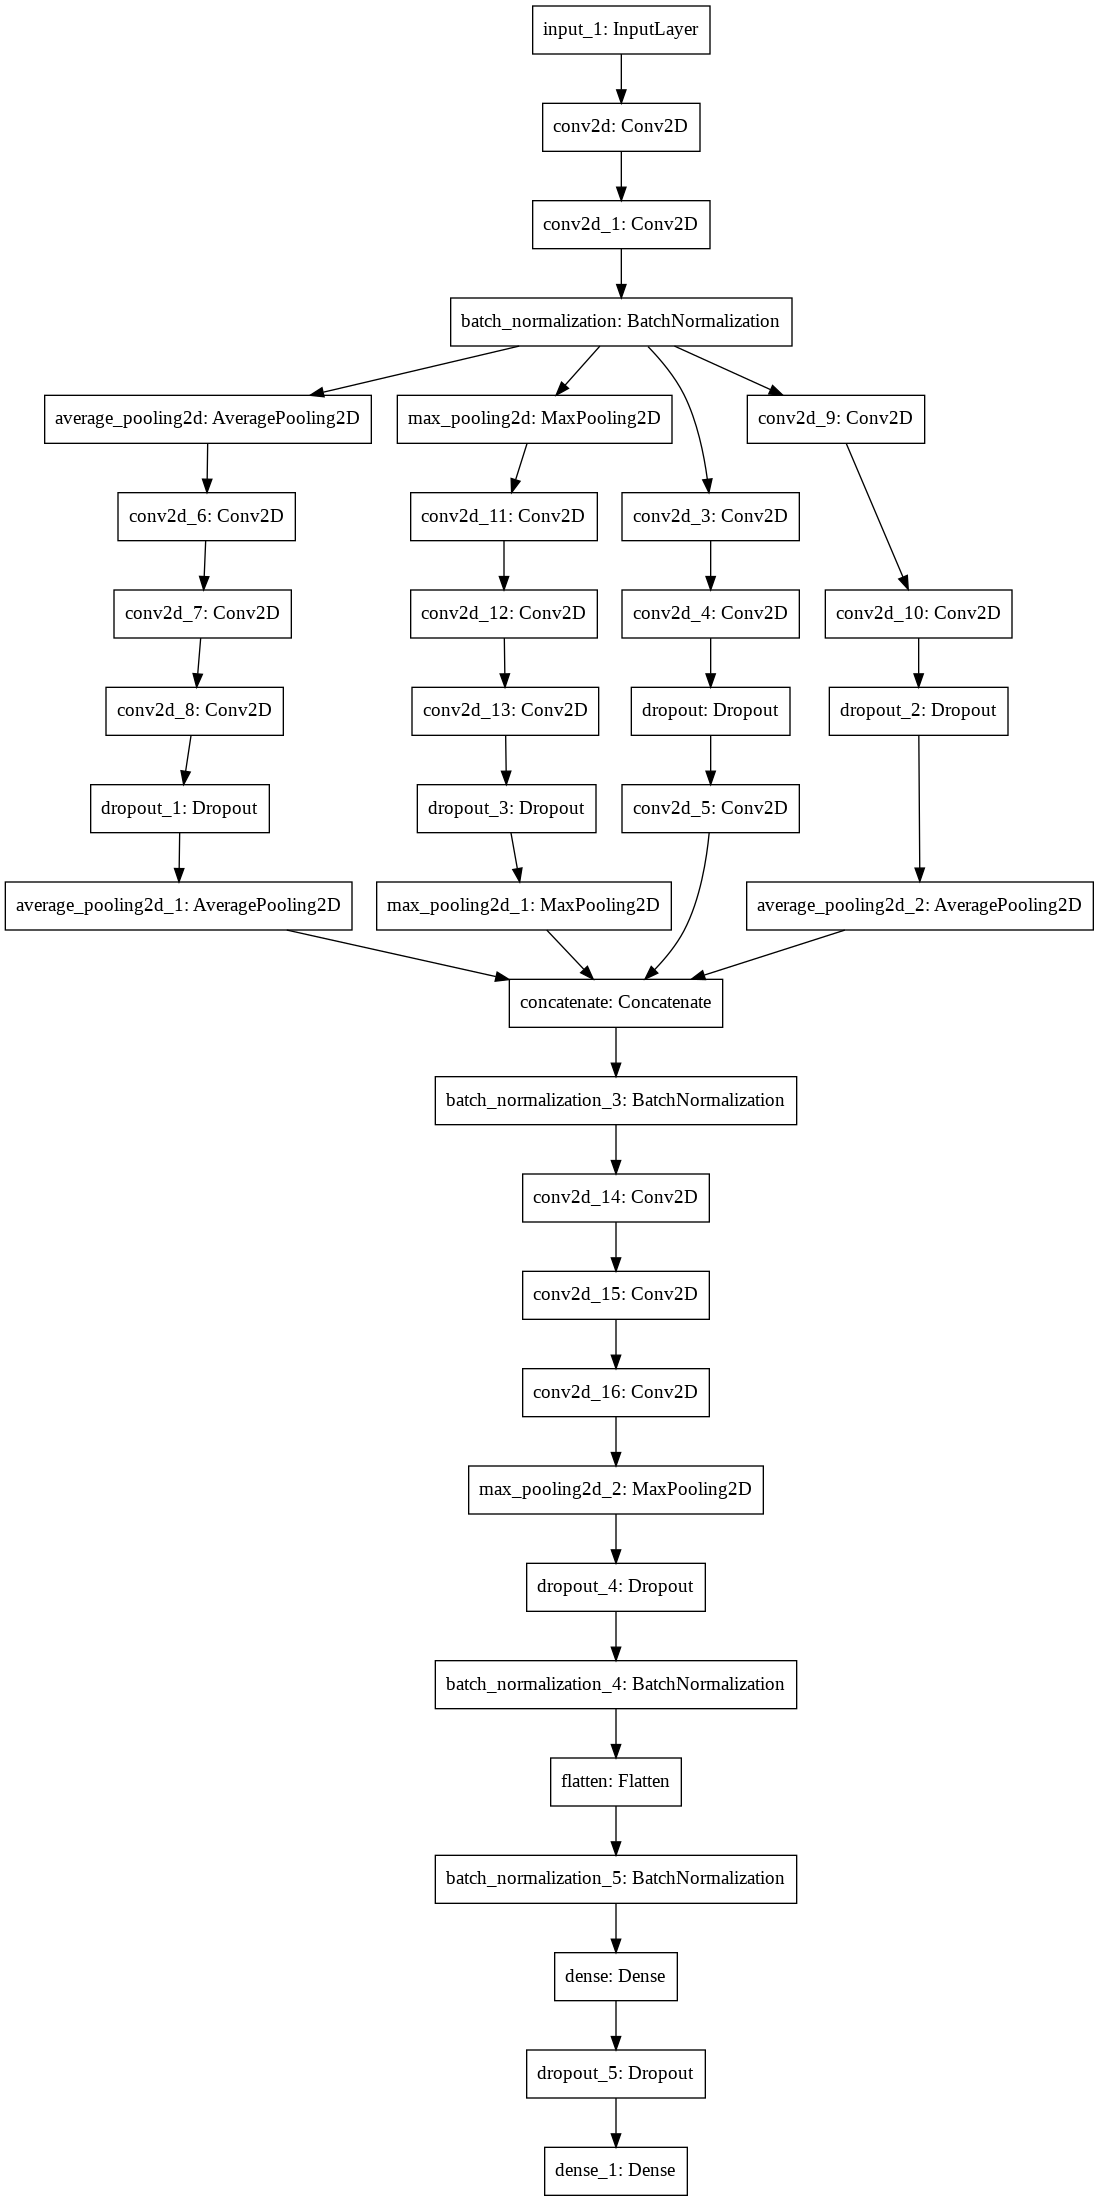

In [ ]:
# Build the model and print (plot) the model.
# Build and print (plot) the model architecture found in figure 7.8 (Chollet)

backend.clear_session()

#input
input = Input(shape=(32,32,3))

#First Layers
conv2d_1 = Conv2D(32, (3,3), padding = 'same', activation='relu')(input)
conv2d_2 = Conv2D(32, (3,3), padding = 'same', activation = 'relu')(conv2d_1)
conv2d_3 = Conv2D(32, (3,3), padding = 'same', activation = 'relu')(conv2d_2)
batch_norm1 = BatchNormalization()(conv2d_2)

#T1
conv2d_3 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer='he_uniform')(batch_norm1)
conv2d_12 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer='he_uniform', strides = 2)(conv2d_3)
dropout1 = Dropout(.25)(conv2d_12)
branch1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer='he_uniform', strides = 2)(dropout1)
#T2
avg_pool = AveragePooling2D((2,2), padding = 'same')(batch_norm1)
conv2d_4 = Conv2D(64, 3, padding = 'same')(avg_pool)
conv2d_5 = Conv2D(64, 3, padding = 'same')(conv2d_4)
b_norm2 = BatchNormalization()(conv2d_5)
conv2d_6 = Conv2D(64, 3, padding = 'same')(conv2d_5)
dropout2 = Dropout(.25)(conv2d_6)
branch2 = AveragePooling2D((2,2), padding = 'same')(dropout2)
#T3
conv2d_10 = Conv2D(64, 5, padding = 'same', kernel_initializer='he_uniform')(batch_norm1)
conv2d_11 = Conv2D(64, 5, padding = 'same', kernel_initializer='he_uniform', strides = 2)(conv2d_10)
dropout3 = Dropout(.25)(conv2d_11)
branch3 = AveragePooling2D((2,2), padding = 'same')(dropout3)
#T4
max_pool = MaxPooling2D((2,2), padding = 'same', )(batch_norm1)
conv2d_7 = Conv2D(64, 5, padding = 'same')(max_pool)
conv2d_8 = Conv2D(64, 5, padding = 'same')(conv2d_7)
b_norm4 = BatchNormalization()(conv2d_8)
conv2d_9 = Conv2D(64, 5, padding = 'same')(conv2d_8)
dropout4 = Dropout(.25)(conv2d_9)
branch4 = MaxPooling2D((2,2), padding = 'same')(dropout4)
#concate
merge = Concatenate(axis=-1)([branch1, branch2, branch3, branch4])

#output conv2d layer
batch_norm2 = BatchNormalization()(merge)
conv2d_10 = Conv2D(128, 3, padding = 'same')(batch_norm2)
conv2d_11 = Conv2D(128, 3, padding = 'same')(conv2d_10)
conv2d_13 = Conv2D(128, 3, padding = 'same')(conv2d_11)
maxpool = MaxPooling2D((2,2), padding = 'same')(conv2d_13)
dropout = Dropout(.25)(maxpool)
batch_norm3 = BatchNormalization()(dropout)

#flatten
flat = Flatten()(batch_norm3)

#Final Layers
batch_norm_2 = BatchNormalization()(flat)
dense_1 = Dense(1024, activation = 'relu')(batch_norm_2)
dropout = Dropout(.4)(dense_1)
output = Dense(10, activation = 'softmax')(dropout)

model = Model(inputs = input, outputs = output)

#plot
plot_model(model)

In [ ]:
# Compile, fit, plot, and assess in one cell.
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 100,
                    verbose = 0,
                    validation_data = (x_val, y_val),
                    callbacks = [EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True)])
hist = pd.DataFrame(history.history)
hist.tail()

results = model.evaluate(test_images, test_labels)

print(results)

313/313 [==============================] - 2s 7ms/step - loss: 0.7486 - accuracy: 0.7715
[0.7486273050308228, 0.7714999914169312]


In [ ]:
hist.tail()

,loss,accuracy,val_loss,val_accuracy
7,0.556132,0.805650,0.790904,0.7420
8,0.495864,0.827500,0.739774,0.7772
9,0.460920,0.837625,1.195271,0.6975
10,0.428796,0.849500,0.816983,0.7601
11,0.391198,0.863550,0.839146,0.7568


### What are the benifits of Funtional API models.  Give an hypothetical example (different than the book) where having different input types would be benificial in API models.  Give another hypotheical exmple (different than the book) where having different output types would be benificial in API models

One hypothetical reason to have multiple different inputs/input types that would be beneficial for a feature image classicification problem. For example if there was an image that was being used to "classify all of the cars found in this image" you could input the images without the segmentation, and then the images with the segmentations as two seperate similar to how you transform images to provide more data, except with the added shapes or classifications set over the images, the data would be different.

### Comment on the model arcitecture that worked the best. What was the accuracy? Did you improve accuracry from last week?  How long did the training take?

The best model arcitecture that I found was adding more hidden layers, and because the model started to get more complicated I used a kernerl initializer on the convolution layers to increase accuracy. After looking a the lanet model, I would further increase the accuracy of this model by adding more split layers and then concatenating further. My model performed about 4% worse than the model last week unfortunately, and the training was longer which led to time constraints of adjusting the model. The longest training took about 5 minutes or so.